# **Project Name - From Screen to Stats: An EDA on Amazon Prime TV Shows and Movies**



**Project type** - EDA(**Exploratory Data Analysis**)     

**Contribution** - Individual(**SANJEEV RAJ T**)






# **Project Summary**   
This project focused on performing Exploratory Data Analysis (EDA) on Amazon Prime Video’s catalog to understand trends in its TV shows and movies. Two datasets were used: one containing metadata such as title, type, release year, genre, and IMDb score, and another detailing the cast and crew.

Using Python, with libraries like Pandas, NumPy, Seaborn, and Matplotlib, the data was cleaned and analyzed. Tasks included handling missing values, converting data types, and parsing complex fields like genres and cast lists.

The analysis revealed that movies make up a larger portion of the catalog than TV shows. Drama, Comedy, and Documentary emerged as the most common genres. By processing cast data, the project identified frequently appearing actors, particularly in recurring or regional content.

A timeline of releases showed rapid content growth from 2015 onwards, reflecting Amazon’s increased investment in streaming and original productions. IMDb score analysis indicated that most titles have moderate ratings, typically between 6 and 7.

Overall, the project offered key insights into Amazon Prime’s content strategy, genre focus, and evolving trends. It demonstrated how EDA can help understand user preferences, guide content planning, and support data-driven decisions in the entertainment industry.


# **GitHub Link** - https://github.com/SanjeevFOfin/From-Screen-to-Stats-An-EDA-on-Amazon-Prime-TV-Shows-and-Movies

# **Problem** **Statement**









This dataset was created to analyze all shows available on Amazon Prime Video, with the goal of extracting valuable insights such as:

*   Content Diversity:Identify which genres and categories dominate the platform.

*   Regional Availability:
Understand how content distribution varies across different regions.

*   Trends Over Time:
Analyze how Amazon Prime’s content library has evolved over the years.

*   IMDb Ratings & Popularity:
Discover which shows are the highest-rated or most popular on the platform.

By analyzing this dataset, businesses, content creators, and data analysts can uncover key trends that influence:

*   Subscription growth
*   User engagement

Content investment strategies in the streaming industry



# **Welcome to Prime** **Analytics**

*Data Snapshot*



Importing the Libraries

In [3]:

import pandas as pd     # For data manipulation
import numpy as np      # For numerical operations
import ast              # For converting stringified lists (e.g., cast, genres)
import matplotlib.pyplot as plt    # Basic plotting
import seaborn as sns              # Enhanced visualizations
import missingno as msno           # Advanced visualizations
import plotly.express as px        # Interactive plots
import wordcloud                   # For visualizing text (e.g., common genres)
import warnings                    # To ignore warnings
warnings.filterwarnings('ignore')   # Ignore warnings

Starting Point: Dataset Access

In [4]:
#Load Dataset
titles=pd.read_csv('titles.csv')
credits=pd.read_csv('credits.csv')

Raw Data Preview

In [5]:
titles  #Viewing dataset 1

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9866,tm510327,Lily Is Here,MOVIE,Dallas and heroin have one thing in common: Du...,2021,NaN,93,['drama'],['US'],NaN,tt7672388,5.3,20.0,1.406,NaN
9867,tm1079144,Jay Nog: Something from Nothing,MOVIE,Something From Nothing takes you on a stand-up...,2021,NaN,55,['comedy'],['US'],NaN,tt15041600,NaN,NaN,0.600,NaN
9868,tm847725,Chasing,MOVIE,A cop from Chennai sets out to nab a dreaded d...,2021,NaN,116,['crime'],['IN'],NaN,NaN,NaN,NaN,1.960,NaN
9869,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN


In [6]:
credits # Viewing dataset 2

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR
...,...,...,...,...,...
124230,1938589,tm1054116,Sangam Shukla,Madhav,ACTOR
124231,1938565,tm1054116,Vijay Thakur,Sanjay Thakur,ACTOR
124232,728899,tm1054116,Vanya Wellens,Budhiya,ACTOR
124233,1938620,tm1054116,Vishwa Bhanu,Gissu,ACTOR


Concatenation of Data

In [7]:
# Merging both Datasets
Amazon = pd.merge(titles, credits, on='id')
Amazon

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,59401,Joe Besser,Joe,ACTOR
1,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,31460,Moe Howard,Moe,ACTOR
2,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,31461,Larry Fine,Larry,ACTOR
3,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0,21174,Buster Keaton,Johnny Gray,ACTOR
4,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0,28713,Marion Mack,Annabelle Lee,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124342,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN,1938589,Sangam Shukla,Madhav,ACTOR
124343,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN,1938565,Vijay Thakur,Sanjay Thakur,ACTOR
124344,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN,728899,Vanya Wellens,Budhiya,ACTOR
124345,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN,1938620,Vishwa Bhanu,Gissu,ACTOR


Data Shape Overview

In [8]:
# Dataset rows & columns
print(Amazon.shape)


(124347, 19)


In [9]:
#Fetching all the columns of Dataset
Amazon.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score', 'person_id', 'name', 'character', 'role'],
      dtype='object')

Feature Summary

In [10]:
#Dataset Information
Amazon.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124347 entries, 0 to 124346
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    124347 non-null  object 
 1   title                 124347 non-null  object 
 2   type                  124347 non-null  object 
 3   description           124256 non-null  object 
 4   release_year          124347 non-null  int64  
 5   age_certification     56707 non-null   object 
 6   runtime               124347 non-null  int64  
 7   genres                124347 non-null  object 
 8   production_countries  124347 non-null  object 
 9   seasons               8153 non-null    float64
 10  imdb_id               119044 non-null  object 
 11  imdb_score            118296 non-null  float64
 12  imdb_votes            118272 non-null  float64
 13  tmdb_popularity       124332 non-null  float64
 14  tmdb_score            114082 non-null  float64
 15  

Data Redundancy

In [11]:
# Checking for Duplicates
print('Amazon_duplicates:',Amazon.duplicated().sum())

Amazon_duplicates: 168


Holes in the Dataset

In [12]:
# Checking Missing Values / Null  Values Count
print(Amazon.isnull().sum())


id                           0
title                        0
type                         0
description                 91
release_year                 0
age_certification        67640
runtime                      0
genres                       0
production_countries         0
seasons                 116194
imdb_id                   5303
imdb_score                6051
imdb_votes                6075
tmdb_popularity             15
tmdb_score               10265
person_id                    0
name                         0
character                16307
role                         0
dtype: int64


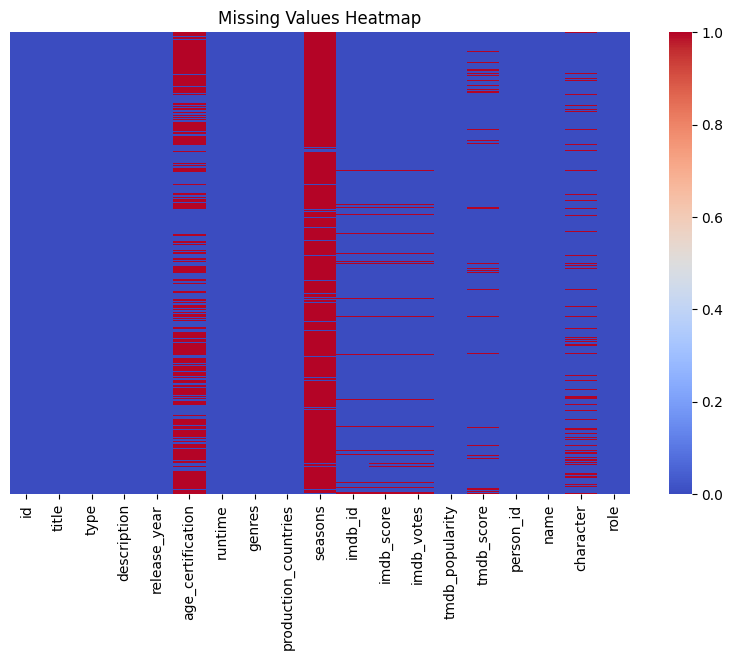

In [13]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(Amazon.isnull(), cbar=True, cmap='coolwarm', yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

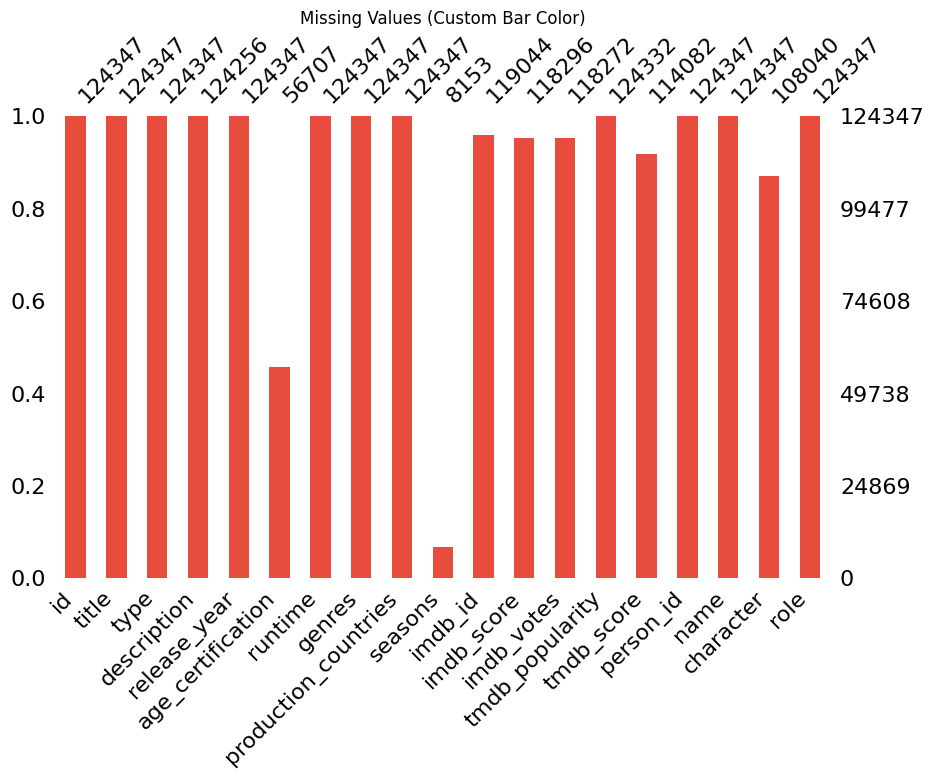

In [14]:
import missingno as msno

# as a bar chart


msno.bar(Amazon, figsize=(10, 6), color='#e74c3c')
plt.title("Missing Values (Custom Bar Color)")
plt.show()


# **Key Features Explained**

**Data Story So Far**



This dataset offers a comprehensive view of content available on Amazon Prime Video in the United States, with the goal of uncovering patterns in genre distribution, content type, popularity, and the people behind each production.

The data is split into two files:

titles.csv – Contains metadata for over 9,000 titles, including both movies and TV shows.

credits.csv – Contains more than 124,000 credit entries for actors and directors linked to those titles.

🧾 titles.csv – Title Metadata
Each row represents a unique movie or show, with details such as:

📌 id: Unique identifier for the title

🎬 title: Name of the show or movie

🧾 show_type: Indicates whether it's a MOVIE or SHOW

🗒️ description: Brief summary of the content

📆 release_year: Year it was released

🔞 age_certification: Age rating (e.g., PG, R, TV-14)

⏱️ runtime: Length of the content in minutes

🎭 genres: One or more genres associated with the title

🌍 production_countries: Countries involved in production

📺 seasons: Number of seasons (if applicable)

🎞️ imdb_id / imdb_score / imdb_votes: IMDb metadata

⭐ tmdb_score / tmdb_popularity: Ratings and popularity from TMDB

👥 credits.csv – Cast and Crew Details
Each row represents a single credit (person-title pair) with:

🆔 person_ID: Unique ID of the actor or director

🎞️ id: The title ID the person is associated with

👤 name: Name of the actor or director

🎭 character_name: Role played (for actors)

🎬 role: Whether the person is an ACTOR or DIRECTOR

In [15]:
# Dataset Columns
print(Amazon.columns)

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score', 'person_id', 'name', 'character', 'role'],
      dtype='object')


In [16]:
# Get number of unique values in each column
unique_counts = Amazon.nunique()

# Display the result
print("Unique values per column:\n")
print(unique_counts)

Unique values per column:

id                       8861
title                    8748
type                        2
description              8833
release_year              110
age_certification          11
runtime                   204
genres                   1965
production_countries      482
seasons                    30
imdb_id                  8267
imdb_score                 85
imdb_votes               3623
tmdb_popularity          5267
tmdb_score                 88
person_id               80508
name                    79758
character               71097
role                        2
dtype: int64


# **Data** **Wrangling**

In [17]:
# Checking Missing Values / Null  Values Count
print(Amazon.isnull().sum())


id                           0
title                        0
type                         0
description                 91
release_year                 0
age_certification        67640
runtime                      0
genres                       0
production_countries         0
seasons                 116194
imdb_id                   5303
imdb_score                6051
imdb_votes                6075
tmdb_popularity             15
tmdb_score               10265
person_id                    0
name                         0
character                16307
role                         0
dtype: int64


In [18]:
#Droping & Replacing Null values
Amazon.dropna(subset=['description'],inplace=True)#Unique values is droped

In [19]:
Amazon['age_certification'].fillna('Not Rated', inplace=True)

In [20]:
Amazon['age_certification'].fillna(Amazon['age_certification'].mode()[0],inplace=True)#Replacing Age Certification by mode

In [21]:
Amazon['seasons'].fillna(0,inplace=True)#Replacing null values with 0 in seasons,because Moviesor Entertainment has no seasons.

In [22]:
Amazon.dropna(subset=['imdb_id'],inplace=True)#Droping all null values in imdb_id column since it is unique.

In [23]:
#replacing Null values in imdb_score with mean of the imdb_score,because droping would result in data loss and inaccurate data.
round(Amazon['imdb_score'].mean(),1)
Amazon['imdb_score'].fillna(round(Amazon['imdb_score'].mean(),1),inplace=True)

In [24]:
Amazon['imdb_votes'].fillna(0,inplace=True)#Droping null values since it is unique.


In [25]:
#recheck of null values
print(Amazon.isnull().sum())

id                          0
title                       0
type                        0
description                 0
release_year                0
age_certification           0
runtime                     0
genres                      0
production_countries        0
seasons                     0
imdb_id                     0
imdb_score                  0
imdb_votes                  0
tmdb_popularity            13
tmdb_score               9118
person_id                   0
name                        0
character               14989
role                        0
dtype: int64


In [26]:
round(Amazon['tmdb_popularity'].mean(),2)
Amazon['tmdb_popularity'].fillna(round(Amazon['tmdb_popularity'].mean(),2),inplace=True)

In [27]:
#replacing Null values in tmdb_score with mean of the tmdb_score,because droping would result in data loss and inaccurate data.
round(Amazon['tmdb_score'].mean(),1)
Amazon['tmdb_score'].fillna(round(Amazon['tmdb_score'].mean(),1),inplace=True)

In [28]:
Amazon['character'].fillna('Unknown',inplace=True)#Character changes from one to another Movie,so replacing it with 'Unknown'

In [29]:
#recheck of null values
print(Amazon.isnull().sum())

id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
person_id               0
name                    0
character               0
role                    0
dtype: int64


In [30]:
#cleaned dataset shape
Amazon.shape

(119022, 19)

In [31]:
# Checking for Duplicates
print('Amazon_duplicates:',Amazon.duplicated().sum())

Amazon_duplicates: 168


In [32]:
Amazon.drop_duplicates(inplace=True)#Droping duplicates for accurate Analysis

In [33]:
#Recheck for duplicates
print('Amazon_duplicates:',Amazon.duplicated().sum())

Amazon_duplicates: 0


In [34]:
Amazon.dtypes

,0
id,object
title,object
type,object
description,object
release_year,int64
age_certification,object
runtime,int64
genres,object
production_countries,object
seasons,float64


In [35]:
#Statistical description of cleaned dataset(Numerical Values)
Amazon.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id
count,118854.000000,118854.000000,118854.000000,118854.000000,1.188540e+05,118854.000000,118854.000000,1.188540e+05
mean,1995.694592,96.054453,0.153466,5.968800,2.312887e+04,10.334860,5.997704,3.976869e+05
std,28.010517,29.798646,1.006917,1.238147,8.819975e+04,40.786345,1.252196,5.549632e+05
min,1912.000000,1.000000,0.000000,1.100000,0.000000e+00,0.000164,0.800000,1.000000e+00
25%,1980.000000,83.000000,0.000000,5.200000,2.790000e+02,1.917000,5.400000,3.821300e+04
50%,2009.000000,94.000000,0.000000,6.000000,1.227000e+03,3.960000,6.000000,1.323810e+05
75%,2017.000000,109.000000,0.000000,6.800000,7.040000e+03,8.924000,6.800000,5.633935e+05
max,2022.000000,328.000000,49.000000,9.900000,1.133692e+06,1437.906000,10.000000,2.371153e+06


In [36]:
# Added New column for statistical analysis on Movies and Shows.
Amazon['is_movie'] = Amazon['type'].apply(lambda x: 1 if x == 'MOVIE' else 0)



In [37]:
print(Amazon.columns)

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score', 'person_id', 'name', 'character', 'role', 'is_movie'],
      dtype='object')


In [38]:
#Properly Renamed the columns
Amazon.rename(columns={
    'id':'ID', 'title':'Title', 'type':'Content_type', 'description':'Description', 'release_year':'Release_Year',
       'age_certification':'Age_Certification', 'runtime':'Runtime', 'genres':'Genres', 'production_countries':'Production_Countries',
       'seasons':'Seasons', 'imdb_id':'IMDB_ID', 'imdb_score':'IMDB_Score', 'imdb_votes':'IMDB_Votes', 'tmdb_popularity':'TMDB_Popularity',
       'tmdb_score':'TMDB_Score', 'person_id':'Person_ID', 'name':'Name', 'character':'Character', 'role':'Role', 'is_movie':'Is_Movie'
}, inplace=True)

In [39]:
#Reset Index Considering ID as Index
Amazon.reset_index(drop=True, inplace=True)

In [40]:
#Renaming the dataset for further Visualization
Amazon.to_csv("Amazon_cleaned.csv", index=False)

Manipulations & Insights found


*   Merging two datasets using common column 'ID'after Loading.
*   Cleared Null values by droping in columns with unique values.
*   Relpaced Null values based on Datatypes with Mean,Mode and texts like'Unknown'
*   Identified and Removed Duplicate values in the columns.
*   Added New Column 'is_movie' for statistical analysis.

*   Renamed All Columns with Proper title.


*   Dropped Index

*   New Dataset saved for further process.











In [41]:
#Download access in coding
from google.colab import files
files.download("Amazon_cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
# Load the cleaned data
amazon_cleaned_df = pd.read_csv("Amazon_cleaned.csv")

# **Visual Analytics & Data Storytelling**

Visual analytics combines interactive data visualization with advanced analytics to uncover patterns, trends, and insights. Data storytelling uses these visuals to craft clear, engaging narratives that help audiences understand and act on data-driven findings.



# Univariate Analysis

**Content Type Distribution**

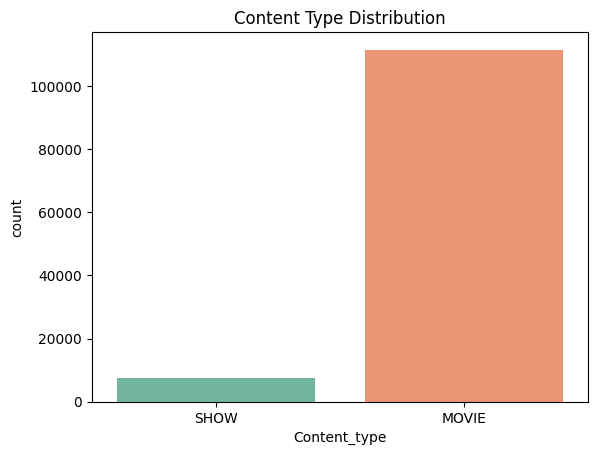

In [43]:
# Create the count plot
sns.countplot(data=amazon_cleaned_df, x='Content_type', palette='Set2')
plt.title("Content Type Distribution")
plt.show()

**Release Year Distribution**

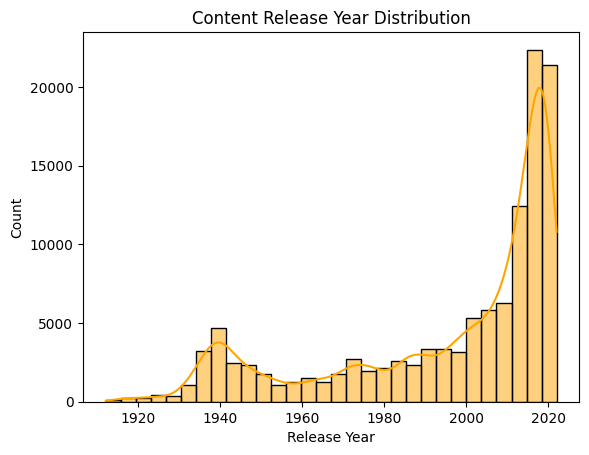

In [44]:
sns.histplot(amazon_cleaned_df['Release_Year'], bins=30, kde=True, color='orange')
plt.title("Content Release Year Distribution")
plt.xlabel("Release Year")
plt.show()


**Age Certification Count**

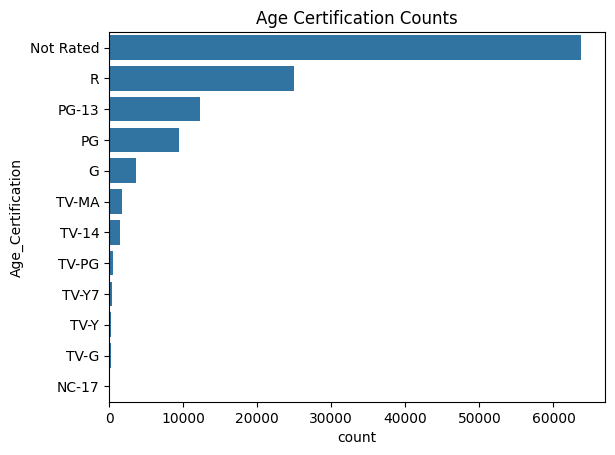

In [45]:
sns.countplot(data=amazon_cleaned_df, y='Age_Certification', order=amazon_cleaned_df['Age_Certification'].value_counts().index)
plt.title("Age Certification Counts")
plt.show()

**IMDb Score Distribution**

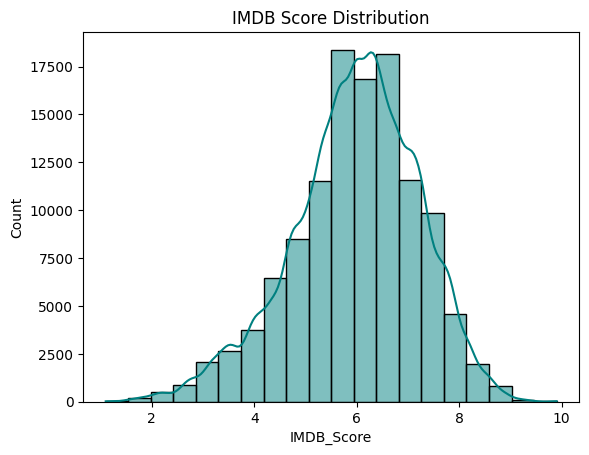

In [46]:
sns.histplot(amazon_cleaned_df['IMDB_Score'], bins=20, kde=True, color='teal')
plt.title("IMDB Score Distribution")
plt.show()


**Top 10 Genres**

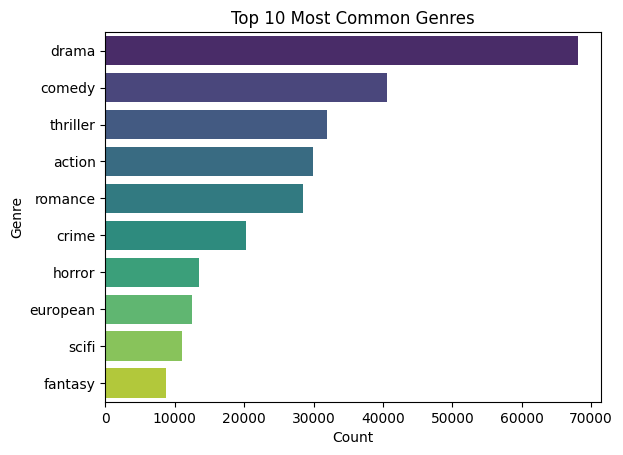

In [47]:
from collections import Counter
import ast

all_genres = amazon_cleaned_df['Genres'].dropna().apply(ast.literal_eval).explode()
top_genres = Counter(all_genres).most_common(10)

genre_names = [g[0] for g in top_genres]
genre_counts = [g[1] for g in top_genres]

sns.barplot(x=genre_counts, y=genre_names, palette='viridis')
plt.title("Top 10 Most Common Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


# Bivariate Analysis

**IMDb Score by Content Type**

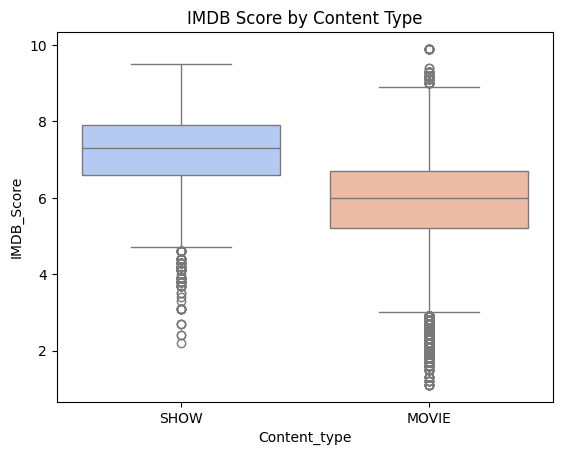

In [48]:
sns.boxplot(data=amazon_cleaned_df, x='Content_type', y='IMDB_Score', palette='coolwarm')
plt.title("IMDB Score by Content Type")
plt.show()

**Runtime Distribution by Content Type**

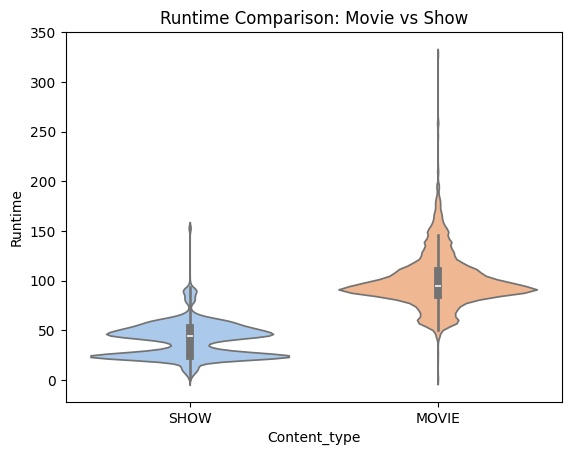

In [49]:
sns.violinplot(data=amazon_cleaned_df, x='Content_type', y='Runtime', palette='pastel')
plt.title("Runtime Comparison: Movie vs Show")
plt.show()


**TMDb Score vs IMDb Score**

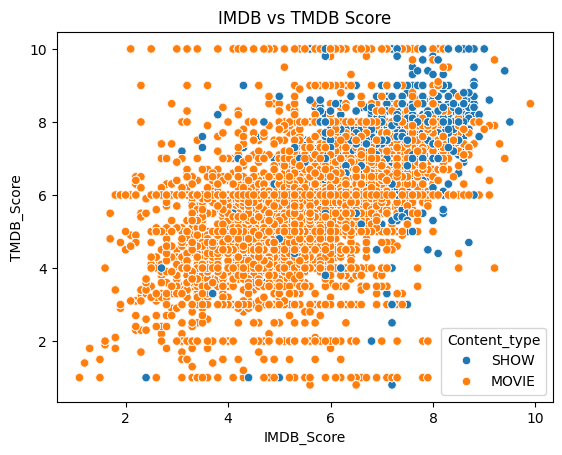

In [50]:
sns.scatterplot(data=amazon_cleaned_df, x='IMDB_Score', y='TMDB_Score', hue='Content_type')
plt.title("IMDB vs TMDB Score")
plt.show()


**Average IMDb Score by Age Certification**

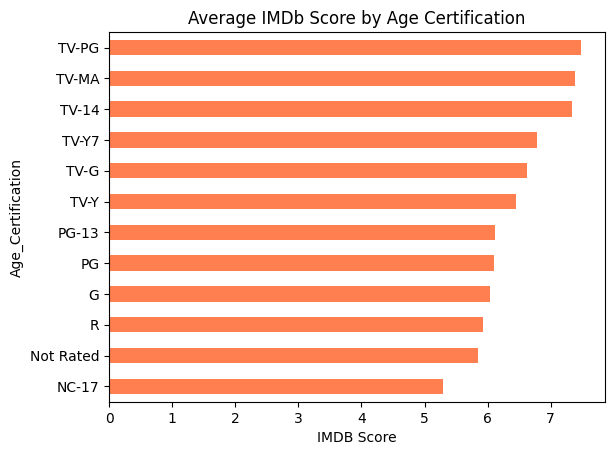

In [51]:
avg_imdb = amazon_cleaned_df.groupby('Age_Certification')['IMDB_Score'].mean().sort_values()
avg_imdb.plot(kind='barh', color='coral')
plt.title("Average IMDb Score by Age Certification")
plt.xlabel("IMDB Score")
plt.show()

**IMDb Score Trend Over Years**



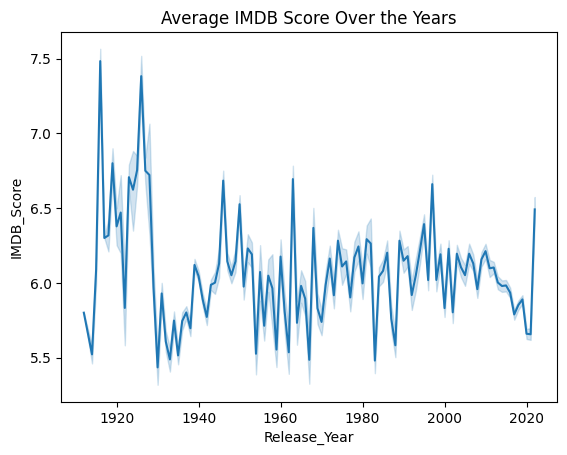

In [52]:
sns.lineplot(data=amazon_cleaned_df, x='Release_Year', y='IMDB_Score', estimator='mean')
plt.title("Average IMDB Score Over the Years")
plt.show()


# Multivariate Analysis

**IMDb Score by Genre and Content Type**



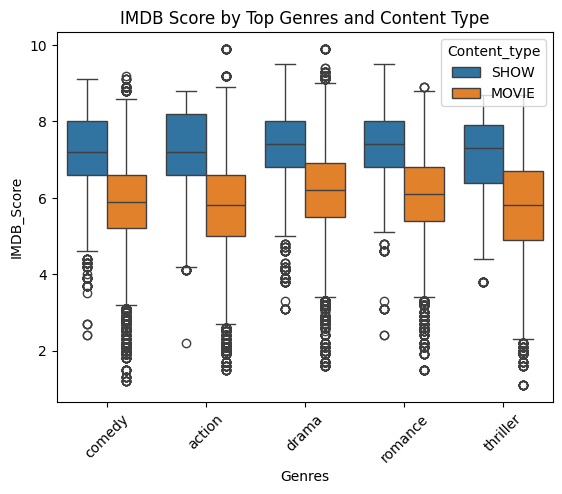

In [53]:
amazon_cleaned_df['Genres'] = amazon_cleaned_df['Genres'].apply(ast.literal_eval)
exploded_df = amazon_cleaned_df.explode('Genres')
top5_genres = exploded_df['Genres'].value_counts().head(5).index

sns.boxplot(data=exploded_df[exploded_df['Genres'].isin(top5_genres)],
            x='Genres', y='IMDB_Score', hue='Content_type')
plt.title("IMDB Score by Top Genres and Content Type")
plt.xticks(rotation=45)
plt.show()


**Correlation Heatmap**

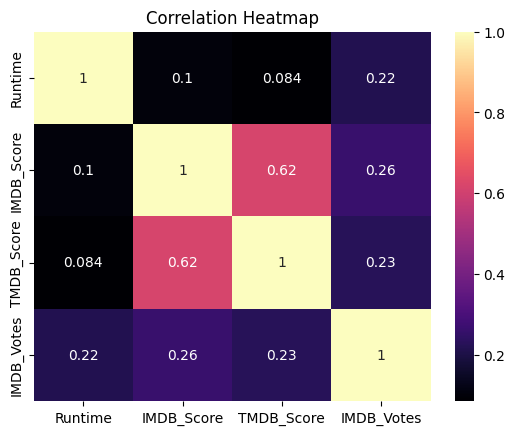

In [54]:
sns.heatmap(amazon_cleaned_df[['Runtime', 'IMDB_Score', 'TMDB_Score', 'IMDB_Votes']].corr(),
            annot=True, cmap='magma')
plt.title("Correlation Heatmap")
plt.show()


**IMDb Score by Country and Content Type**

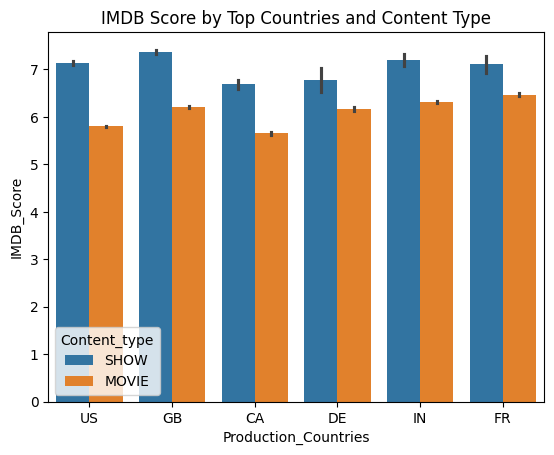

In [55]:
amazon_cleaned_df['Production_Countries'] = amazon_cleaned_df['Production_Countries'].apply(ast.literal_eval)
country_df = amazon_cleaned_df.explode('Production_Countries')
top_countries = country_df['Production_Countries'].value_counts().head(6).index

sns.barplot(data=country_df[country_df['Production_Countries'].isin(top_countries)],
            x='Production_Countries', y='IMDB_Score', hue='Content_type')
plt.title("IMDB Score by Top Countries and Content Type")
plt.show()


**Pair Plot of Scores and Runtime**

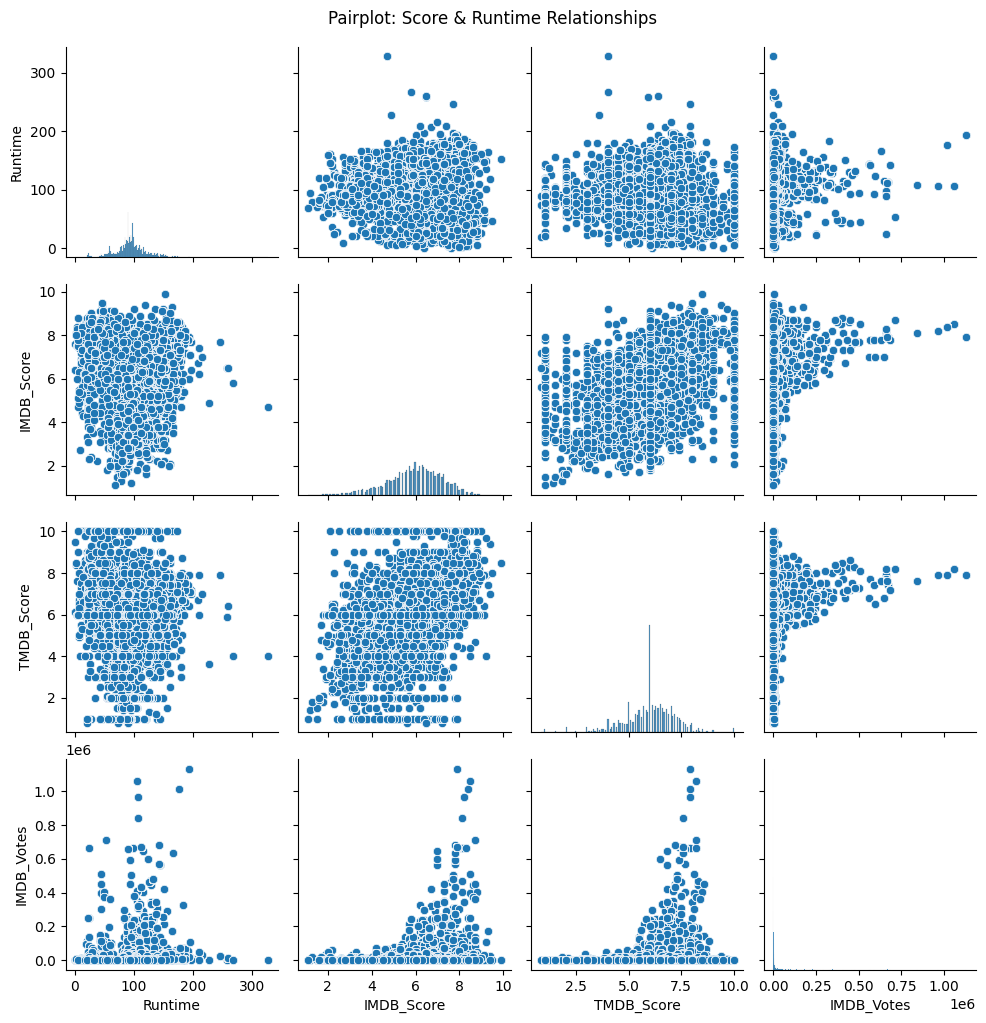

In [56]:
sns.pairplot(amazon_cleaned_df[['Runtime', 'IMDB_Score', 'TMDB_Score', 'IMDB_Votes']].dropna())
plt.suptitle("Pairplot: Score & Runtime Relationships", y=1.02)
plt.show()


**Correlation Heatmap of Numerical Columns**

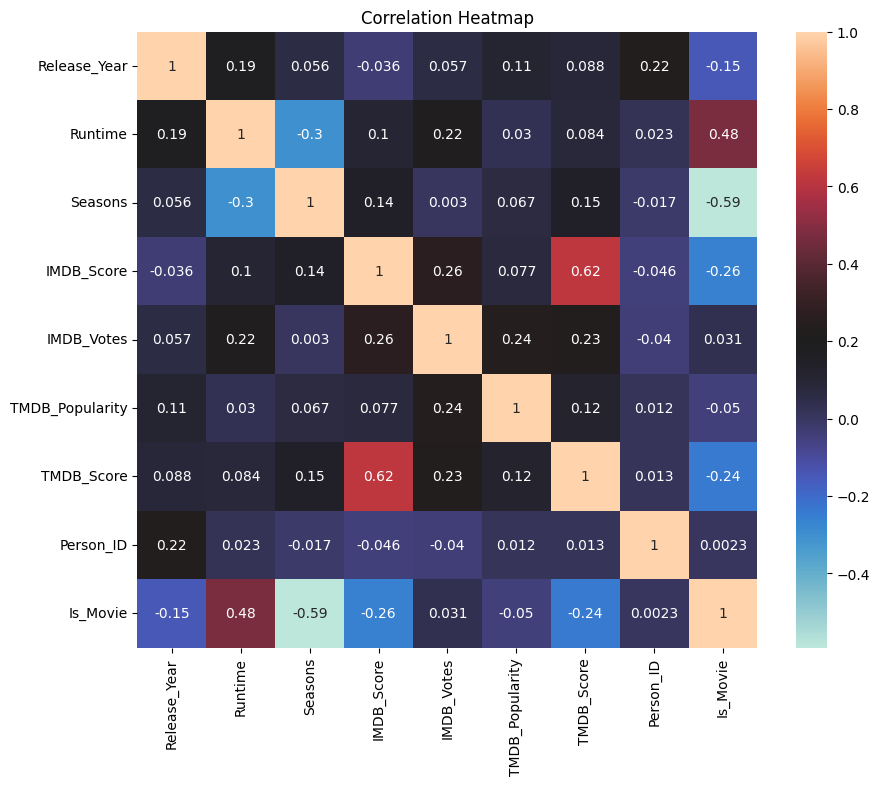

In [57]:
Numerical_columns = amazon_cleaned_df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(amazon_cleaned_df[Numerical_columns].corr(), annot=True, cmap='icefire')
plt.title("Correlation Heatmap")
plt.show()

**IMDb Score by Age Certification and Content Type**

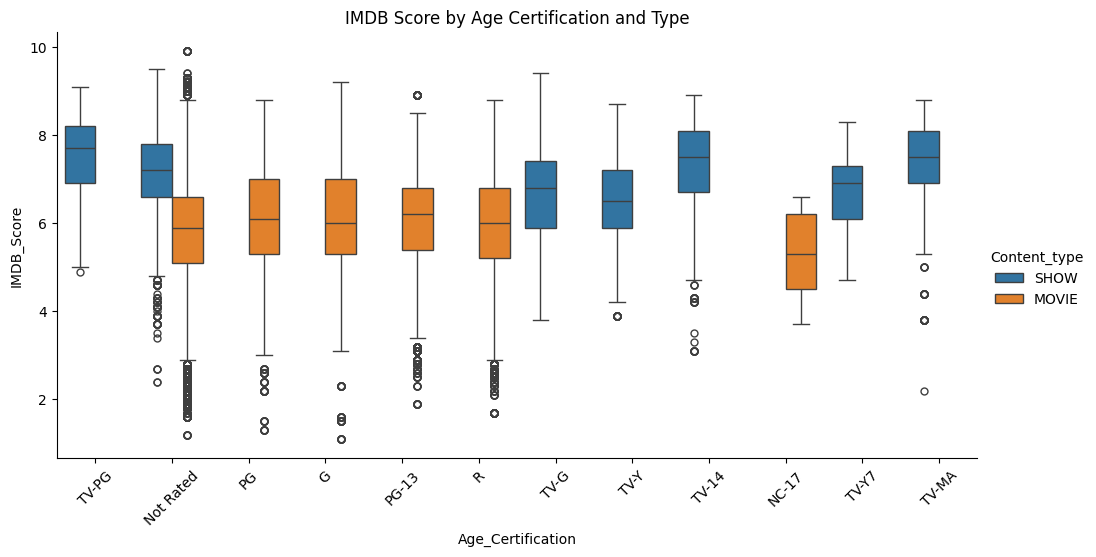

In [58]:
sns.catplot(data=amazon_cleaned_df, x='Age_Certification', y='IMDB_Score',
            hue='Content_type', kind='box', height=5, aspect=2)
plt.title("IMDB Score by Age Certification and Type")
plt.xticks(rotation=45)
plt.show()


**Movies Vs TV Shows by Average IMDb Score**

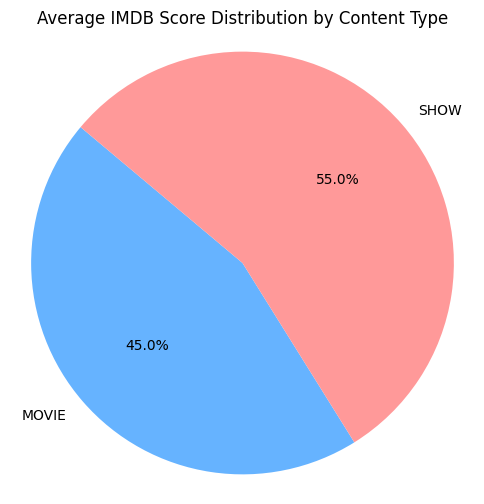

In [59]:
# Calculate average IMDb score per content type
imdb_by_type = amazon_cleaned_df.groupby('Content_type')['IMDB_Score'].mean()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(imdb_by_type, labels=imdb_by_type.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999'])
plt.title("Average IMDB Score Distribution by Content Type")
plt.axis('equal')  # Equal aspect ratio ensures a circular pie
plt.show()

**Overall Movies Vs TV Shows**

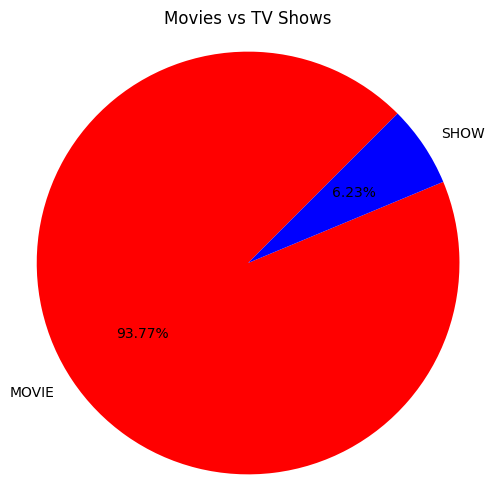

In [60]:

plt.figure(figsize=(6, 6))
plt.pie(
    amazon_cleaned_df['Content_type'].value_counts(),
    labels=amazon_cleaned_df['Content_type'].value_counts().index,
    autopct='%1.2f%%',startangle=45,
    colors=['red', 'blue']  # Red for one, blue for the other
)
plt.title("Movies vs TV Shows")
plt.axis('equal')  # Ensures the pie chart is circular
plt.show()


**Genres vs Content Type using Grouped Bar Chart**

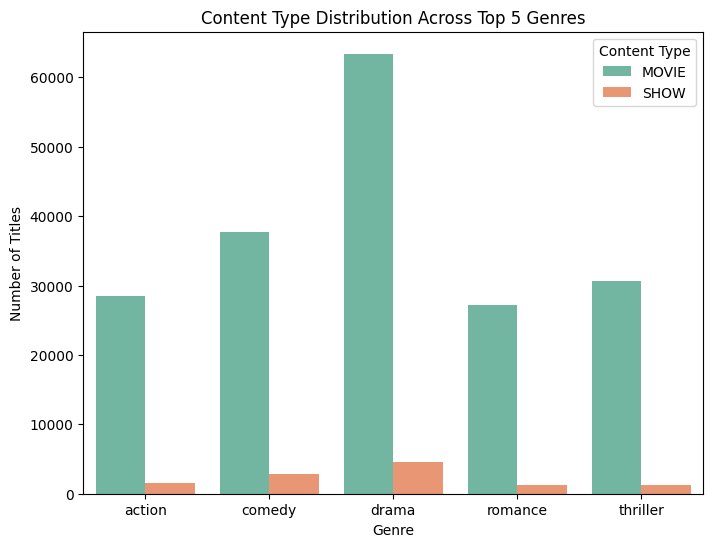

In [61]:

genre_df = amazon_cleaned_df.explode('Genres')

# Get top 5 Genres
top5_genres = genre_df['Genres'].value_counts().head(5).index

# Filter and group by Genre and Content type
filtered = genre_df[genre_df['Genres'].isin(top5_genres)]
grouped = filtered.groupby(['Genres', 'Content_type']).size().reset_index(name='Count')

# Plot as grouped bar chart
plt.figure(figsize=(8, 6))
sns.barplot(data=grouped, x='Genres', y='Count', hue='Content_type', palette='Set2')
plt.title("Content Type Distribution Across Top 5 Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Titles")
plt.legend(title='Content Type')
plt.show()


**Country vs Content Type IMDb Score using Stacked Bar Chart**

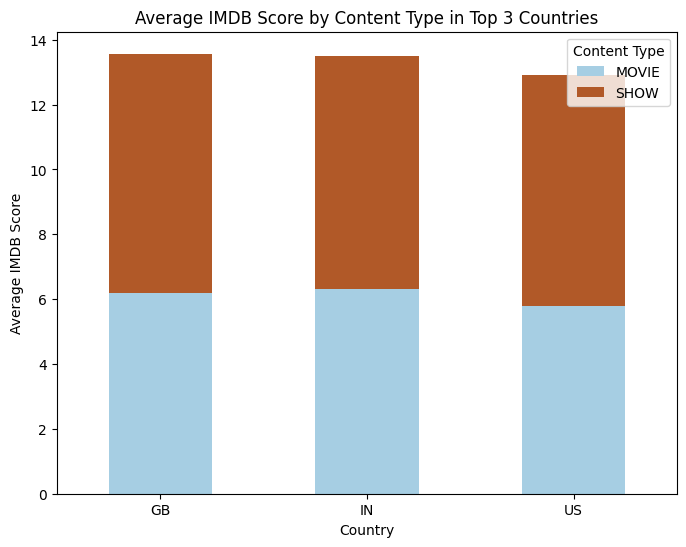

In [62]:

country_df = amazon_cleaned_df.explode('Production_Countries')

# Top 3 countries
top3_countries = country_df['Production_Countries'].value_counts().head(3).index
filtered = country_df[country_df['Production_Countries'].isin(top3_countries)]

# Group by country and content type
grouped_score = filtered.groupby(['Production_Countries', 'Content_type'])['IMDB_Score'].mean().unstack().fillna(0)

# Plot as stacked bar chart
grouped_score.plot(kind='bar', stacked=True, colormap='Paired', figsize=(8, 6))
plt.title("Average IMDB Score by Content Type in Top 3 Countries")
plt.xlabel("Country")
plt.ylabel("Average IMDB Score")
plt.legend(title="Content Type")
plt.xticks(rotation=0)
plt.show()


# Solution to Business Objective

This EDA helps Amazon Prime Video align content strategies with viewer interests. The analysis:











1.   Helps prioritize popular genres like Drama and Comedy, which have the highest share.

2.   Reveals that movies are more prevalent than TV shows, guiding acquisition focus.

3.   Shows that older titles score higher on IMDb/TMDb, supporting the value of classic content.

4.   Indicates that content from the U.S., India, and the UK dominates the catalog, helping target regional investments.


5.   Offers insight into age certifications, aiding parental controls and marketing decisions.

These insights help optimize content planning, user experience, and regional expansion.







# **Conclusion**

📺 Movies dominate the Amazon Prime library, indicating a content-heavy focus on films.🎭 Drama and comedy are the most frequent genres, matching audience preferences.📈 TV shows are expanding in seasons, suggesting increased binge-watching behavior.🕒 Older content receives higher ratings, driven by nostalgia or critical acclaim.🌎 The U.S. leads production, followed by India and the UK.🔞 Diverse age certifications ensure content for all audience groups.⭐ IMDb and TMDb ratings align closely, providing reliable popularity signals.